***Polynomial Model order Selection***
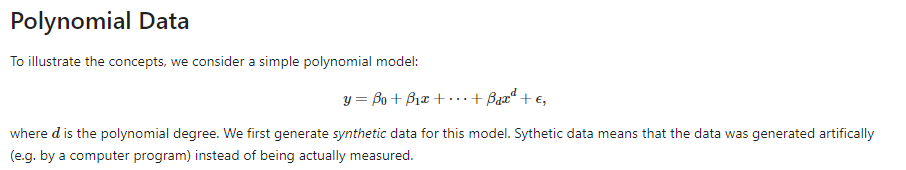

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets,linear_model,preprocessing



# import useful polynomial data
import numpy.polynomial.polynomial as poly

# True model parameters

beta=np.array([1,0.5,0,2]) # Coefficients
wstd=0.4   # noise
dtrue=len(beta)-1 # true poly degree

# Independent data
nsamp=100
xdat=np.random.uniform(-1,1,nsamp)
print(xdat)


# Polynomial
yo=poly.polyval(xdat,beta)
ydat=yo+np.random.normal(0,wstd,nsamp)

[-0.02718844 -0.72731709  0.10763748 -0.40285277 -0.41433043  0.1760316
  0.01627845 -0.52589163 -0.91447463 -0.74488034 -0.52747806  0.16115749
 -0.28193726  0.02662618 -0.76263997  0.78047191 -0.27684558 -0.07888551
  0.90953069 -0.73506042  0.8239033   0.94325479  0.12672785 -0.2250044
  0.58265839  0.80035968  0.69285099 -0.08673512 -0.33058017 -0.03547621
 -0.90881462 -0.02371016 -0.07248896 -0.0042614  -0.35208703  0.50758247
 -0.24651579  0.99981105 -0.69212058  0.85295422 -0.47457313 -0.01717255
  0.81972699  0.39535938 -0.81517874 -0.52917152 -0.95719683 -0.52717898
 -0.67562357 -0.09085963  0.26740327  0.53206064 -0.06804057 -0.07576858
  0.72035441 -0.94820717 -0.97391166 -0.39278169  0.0080411   0.92290444
  0.31797876 -0.62720678 -0.47173109 -0.31258646 -0.60850152  0.14323857
  0.36800122  0.62052166 -0.38942114  0.36433692 -0.11727042 -0.61939006
 -0.81960976 -0.25888163 -0.27214709  0.90182116  0.22563554  0.61913625
  0.56741018  0.80793794 -0.95105716 -0.76107604  0.1

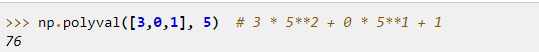




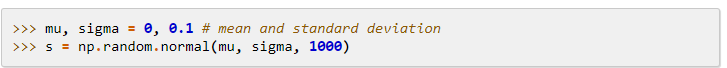

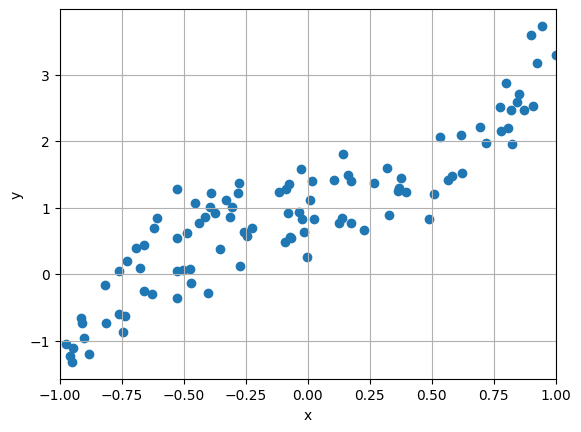

In [3]:
# plotting the data
plt.scatter(xdat,ydat)
plt.xlim([-1,1])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()


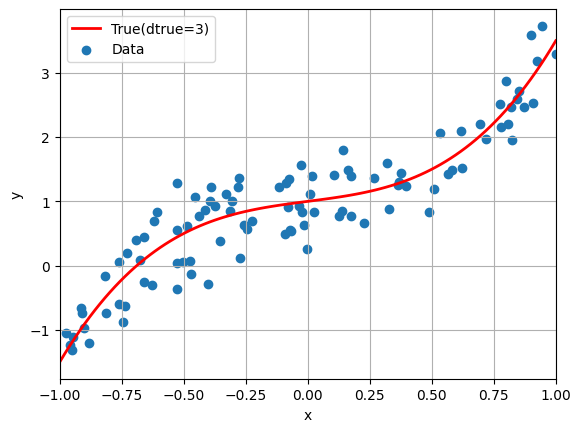

In [4]:
# Plot the true function
xp=np.linspace(-1,1,100)
yp=poly.polyval(xp,beta)
plt.xlim(-1,1)
plt.plot(xp,yp,'r-',linewidth=2.0)


# Plot the scatter plot of the measured data
plt.scatter(xdat,ydat)
plt.xlim([-1,1])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend(['True(dtrue=3)','Data'],loc='upper left')
plt.show()

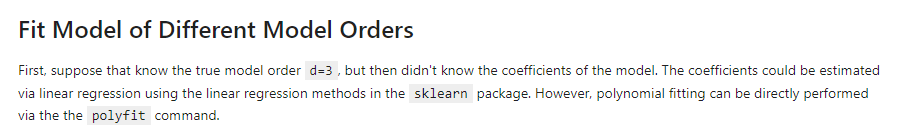

Text(0, 0.5, 'y')

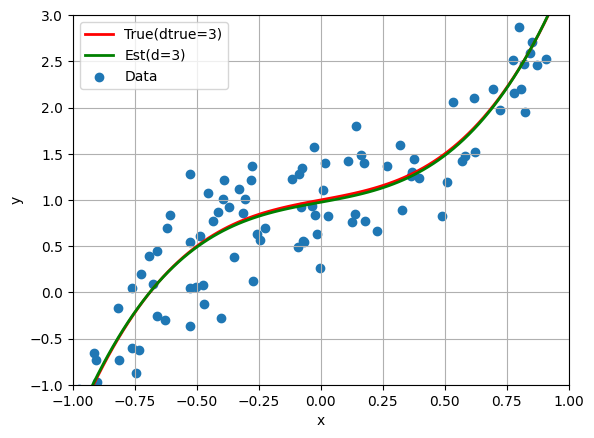

In [5]:
# Fit model of different model orders ( for d=3)
d=3                 #1 ( underfitting) #3 ( Correct)  #10 (Overfitting)
beta_hat=poly.polyfit(xdat,ydat,d)
# plot true and estimated functions
xp=np.linspace(-1,1,100)
yp=poly.polyval(xp,beta)
yp_hat=poly.polyval(xp,beta_hat)
plt.xlim(-1,1)
plt.ylim(-1,3)
plt.plot(xp,yp,'r-',linewidth=2)
plt.plot(xp,yp_hat,'g-',linewidth=2)
# Plotting the data
plt.scatter(xdat,ydat)
plt.legend(['True(dtrue=3)','Est(d=3)','Data'],loc='upper left')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')


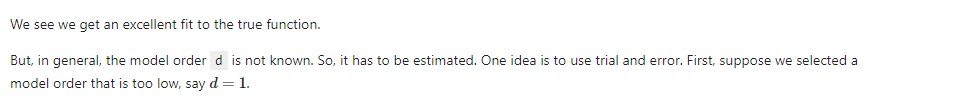

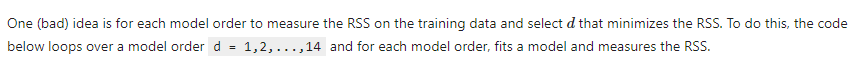

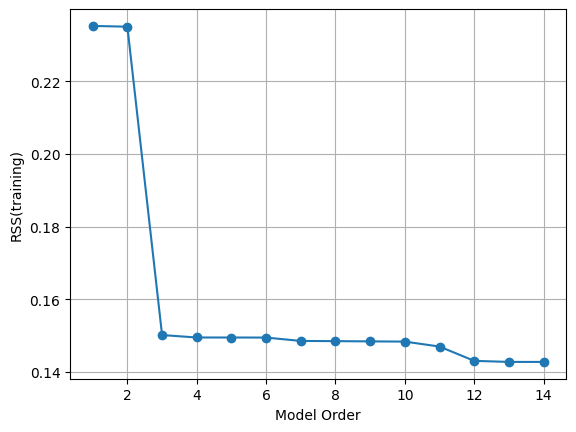

In [6]:
dtest=np.array(range (1,15))
RSS_tr=[]
for d in dtest:
  #Fit Data
  beta_hat=poly.polyfit(xdat,ydat,d)
  # Measure RSS on training data
  y_hat=poly.polyval(xdat,beta_hat)
  RSSd=np.mean((y_hat-ydat)**2)
  RSS_tr.append(RSSd)
plt.plot(dtest,RSS_tr,'o-')
plt.xlabel('Model Order')
plt.ylabel('RSS(training)')
plt.grid()

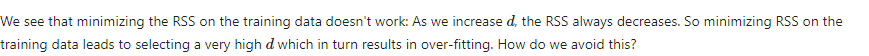

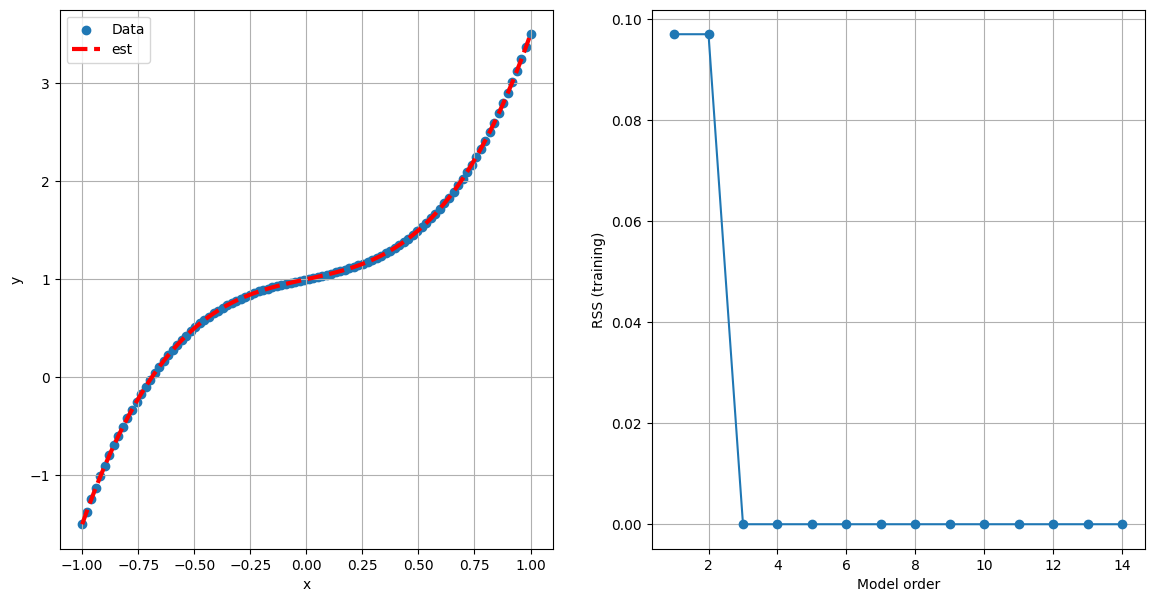

In [7]:
# A good approximation

xnew=np.linspace(-1,1,nsamp)
#Polynomial
ynew=poly.polyval(xnew,beta)
fig,(plot1,plot2)=plt.subplots(1,2,figsize=(14,7))
# Plot Data
plot1.scatter(xnew,ynew)
RSSnew=[]
for d in dtest:
    #Fit data
    beta_hat=poly.polyfit(xnew,ynew,d)
    #Measure RSS on training data
    yhat=poly.polyval(xnew,beta_hat)
    RSSd=np.mean((yhat-ynew)**2)
    RSSnew.append(RSSd)
    if d==3:
      plot1.plot(xnew,yhat,'r--',linewidth=3)

plot1.legend(['Data','est'],loc='upper left')
plot1.grid()
plot1.set_xlabel('x')
plot1.set_ylabel('y')

plot2.plot(dtest,RSSnew,'o-')
plot2.set_xlabel('Model order')
plot2.set_ylabel('RSS (training)')
plot2.grid()

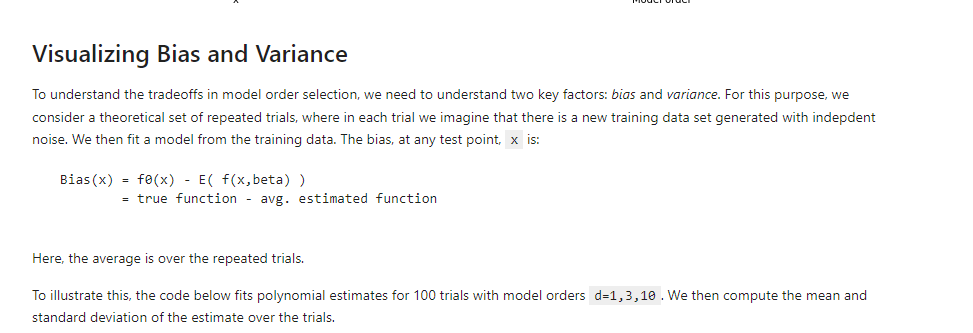

In [8]:
# Visualizing Bias and Variance

ntrial=100 # Number of trials
dtest=[1,3,14]
nd=len(dtest)
# Values to plot true for true function
nplot=30
xp=np.linspace(-1,1,nplot)
yp=poly.polyval(xp,beta)
# Means and std deviation for each model order
yp_hat_mean=np.zeros((nplot,nd))
yp_hat_std=np.zeros((nplot,nd))

for j,d in enumerate(dtest):
  #Values gto plot for estimated functions
  yp_hat=np.zeros((nplot,ntrial))
  for it in range(ntrial):
    #Generate new test data set. Only the noise is varying from one trial to the next
     ydati=yo+np.random.normal(0,wstd,nsamp)
    # Fit the model
     beta_hat=poly.polyfit(xdat,ydati,d)
     yp_hat[:,it]=poly.polyval(xp,beta_hat)

# Compute expectations and standard deviations over the trial

yp_hat_mean[:,j]=np.mean(yp_hat,axis=1)
#print(yp_hat_mean)
yp_hat_std[:,j]=np.std(yp_hat,axis=1)

j 0
d 1
yp_hat_mean [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
j 1
d 3
yp_hat_mean [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
j 2
d 14
yp_hat_mean [-1.66000173 -1.08295296 -0.73182704 -0.41098868 -0.13357818  0.09747418
  0.29308355  0.45941245  0.59603798  0.70269114  0.78337621  0.8450789
  0.89428991  0.93522993  0.97095667  1.00562162  1.04520709  1.09552304
  1.15888695  1.23276974  1.31309273  1.40146966  1.51112809  1.66396575
  1.8752271   2.13453985  2.40782713  2.68594755  3.05243844  3.55967534]


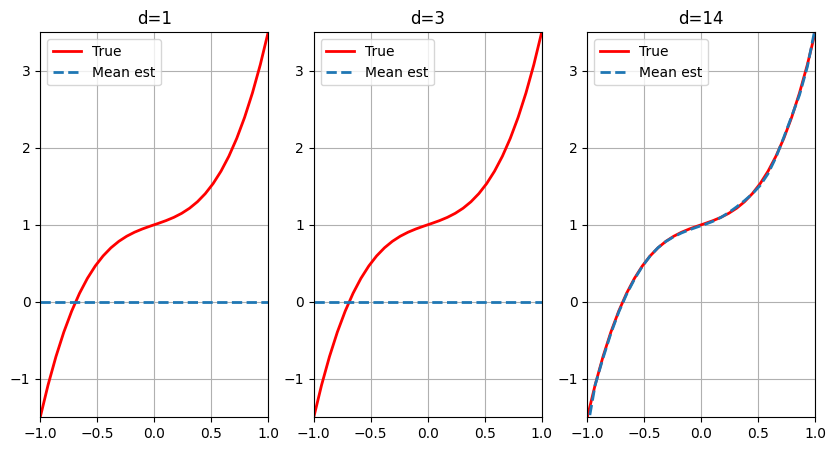

In [9]:
# We plot the average estimate function and true function

plt.figure(figsize=(10,5))
for j, d in enumerate(dtest):
  # Plot the fit
  print("j",j)
  print("d",d)
  plt.subplot(1,nd,j+1)
  plt.xlim(-1,1)
  plt.ylim(-1.5,3.5)
  plt.plot(xp,yp,'r-',linewidth=2)
  print("yp_hat_mean",yp_hat_mean[:,j])
  plt.plot(xp,yp_hat_mean[:,j],'--',linewidth=2)
  plt.title('d=%d' % d)
  plt.grid()
  plt.legend(['True','Mean est'],loc='upper left')

In [10]:
ntrial = 100    # Number of trials
dtest = [1,3,14]  # Model orders to test
nd = len(dtest)

# Values to plot true for the true function
nplot = 30
xp = np.linspace(-1,1,nplot)
yp = poly.polyval(xp,beta)

# Mean and std deviation for each model order
yp_hat_mean = np.zeros((nplot,nd))
yp_hat_std  = np.zeros((nplot,nd))

for j, d in enumerate(dtest):

    # Values to plot for the estimated functions
    yp_hat = np.zeros((nplot,ntrial))

    for it in range(ntrial):

        # Generate new test data.  Only the noise is varying from one trial to the next
        ydati = yo + np.random.normal(0,wstd,nsamp)

        # Fit the model
        beta_hat = poly.polyfit(xdat,ydati,d)
        yp_hat[:,it] = poly.polyval(xp,beta_hat)

    # Compute expectation and std deviation over the trials
    yp_hat_mean[:,j] = np.mean(yp_hat, axis=1)
    yp_hat_std[:,j] = np.std(yp_hat, axis=1)

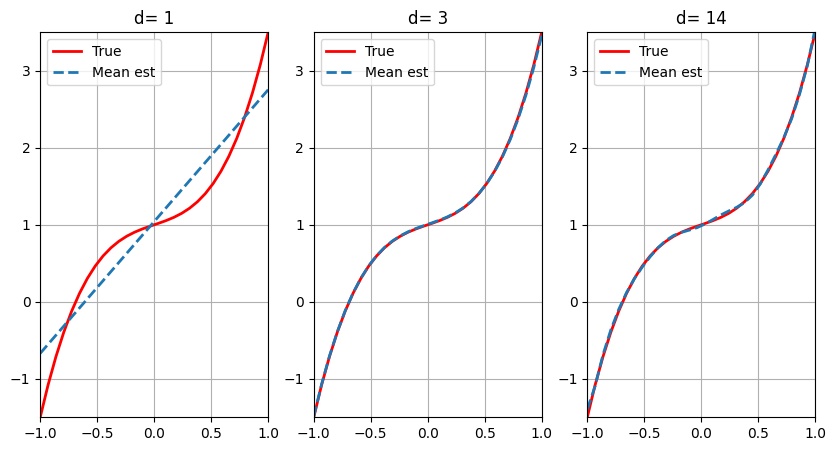

In [11]:
plt.figure(figsize=(10,5))
for j, d in enumerate(dtest):

    # Plot the fit
    plt.subplot(1,nd,j+1)
    plt.xlim(-1,1)
    plt.ylim(-1.5,3.5)
    plt.plot(xp,yp,'r-',linewidth=2)
    plt.plot(xp,yp_hat_mean[:,j], '--', linewidth=2)
    plt.title('d= %d' % d)
    plt.grid()
    plt.legend(['True',  'Mean est'], loc='upper left')

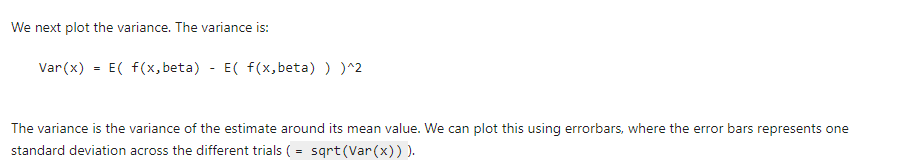

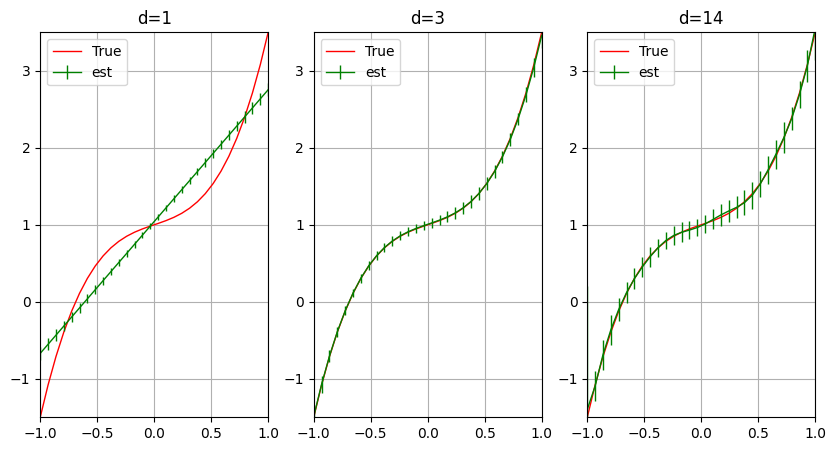

In [12]:
plt.figure(figsize=(10,5))
for j,d in enumerate(dtest):
  # Plot the fit
  plt.subplot(1,nd,j+1)
  plt.xlim(-1,1)
  plt.ylim(-1.5,3.5)
  plt.plot(xp,yp,'r-',linewidth=1)
  plt.errorbar(xp,yp_hat_mean[:,j],fmt='g-',yerr=yp_hat_std[:,j],linewidth=1)
  plt.title('d=%d' %d)
  plt.grid()
  plt.legend(['True','est'],loc='upper left')

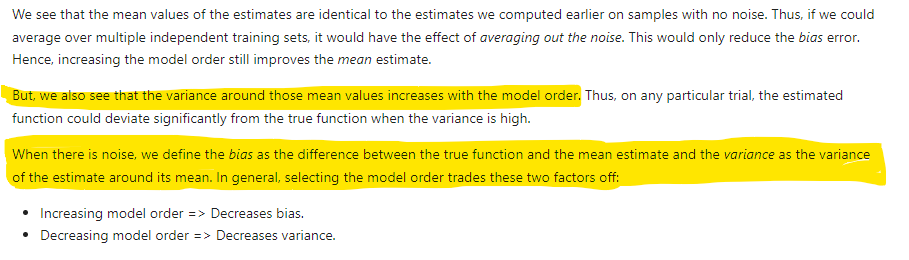

# ***Better Approach***

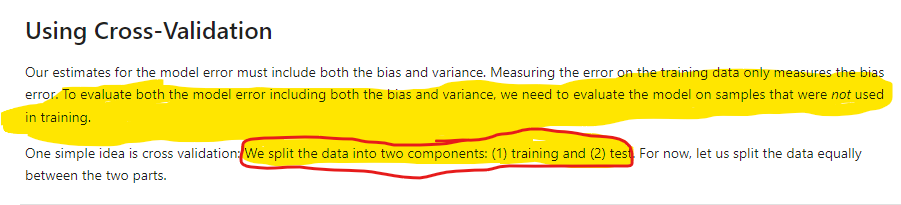

In [13]:
ntr=nsamp //2
nts=nsamp-ntr

# Training
xtr=xdat[:ntr]
ytr=ydat[:ntr]

# Test
xts=xdat[ntr:]
yts=ydat[ntr:]

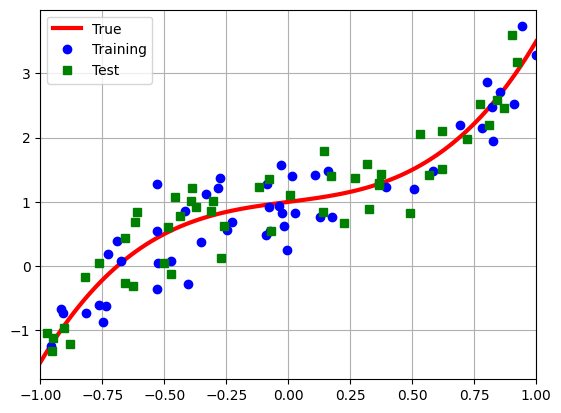

In [14]:
# Plot true function
xp=np.linspace(-1,1,100)
yp=poly.polyval(xp,beta)
plt.xlim(-1,1)
plt.plot(xp,yp,'r-',linewidth=3)

#Plot the data
plt.plot(xtr,ytr,'bo')
plt.plot(xts,yts,'gs')
plt.grid()
plt.legend(['True','Training','Test'],loc='upper left')

***For splitting and Training data***

Estimated model order=4


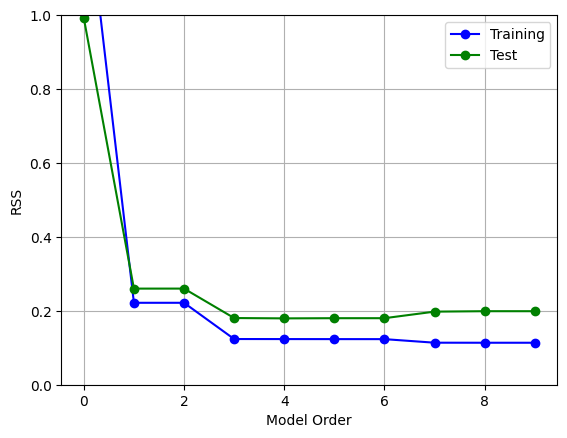

In [15]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(xdat,ydat,test_size=0.5)
dtest=np.array(range(0,10))
RSStest=[]
RSStr=[]
for d in dtest:
  # Fit data
  beta_hat=poly.polyfit(xtr,ytr,d)
  #Measure RSS on training data
  #This is not neceessary but we do it just to show the training error
  yhat=poly.polyval(xtr,beta_hat)
  RSSd=np.mean((yhat-ytr)**2)
  RSStr.append(RSSd)
  #Measure RSS on test data
  yhat=poly.polyval(xts,beta_hat)
  RSSd=np.mean((yhat-yts)**2)
  RSStest.append(RSSd)
plt.plot(dtest,RSStr,'bo-')
plt.plot(dtest,RSStest,'go-')
plt.xlabel('Model Order')
plt.ylabel("RSS")
plt.grid()
plt.ylim(0,1)
plt.legend(['Training','Test'],loc='upper right')

# We select the model from minimum RSS on test data
imin=np.argmin(RSStest)
print("Estimated model order={0:d}".format(dtest[imin]))

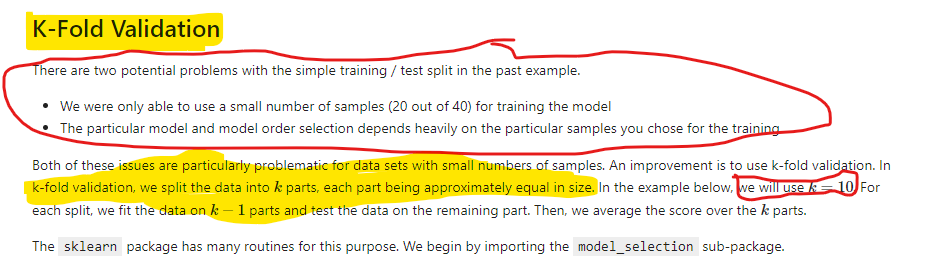

In [20]:
#k Fold validation
import sklearn.model_selection
from sklearn.model_selection import KFold
# Create a k-fold object

nfold=10
kf=sklearn.model_selection.KFold(n_splits=nfold,shuffle=True)
# Model orders to be tested
dtest=np.arange(0,10)
nd=len(dtest)
RSSts=np.zeros((nd,nfold))

#loop over the folds
for isplit,Ind in enumerate(kf.split(xdat)):
  #Get the training data in the split
  Itr,Its=Ind
  #kf.split()returns Ind, which contains the indices to the training and testing data for each field:
  xtr=xdat[Itr]
  ytr=ydat[Itr]
  xts=xdat[Its]
  yts=ydat[Its]

# Loop over the model order
for it, d in enumerate(dtest):
  #Fit data over training data
  beta_hat=poly.polyfit(xtr,ytr,d)
  #Measure RSS on test data
  yhat=poly.polyval(xts,beta_hat)
  RSSts[it,isplit]=np.mean((yhat-yts)**2)

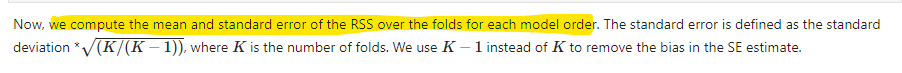

The selected model order is 4


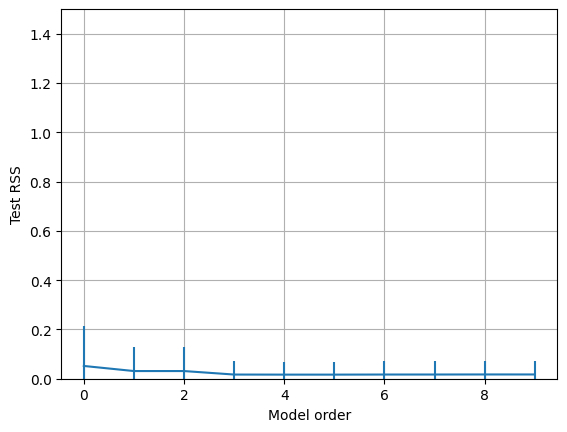

In [21]:
RSS_mean=np.mean(RSSts,axis=1)# note mean is taken over the second dimensions, i.e all folds for the same model order
RSS_std=np.std(RSSts,axis=1)*np.sqrt(nfold)/np.sqrt(nfold-1)
plt.errorbar(dtest,RSS_mean,yerr=RSS_std,fmt='-')
plt.ylim(0,1.5)
plt.xlabel('Model order')
plt.ylabel('Test RSS')
plt.grid()

imin=np.argmin(RSS_mean)
print("The selected model order is {0:d}".format(dtest[imin]))


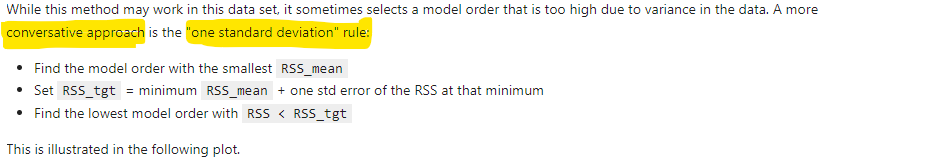

The estimated ,model order is 0


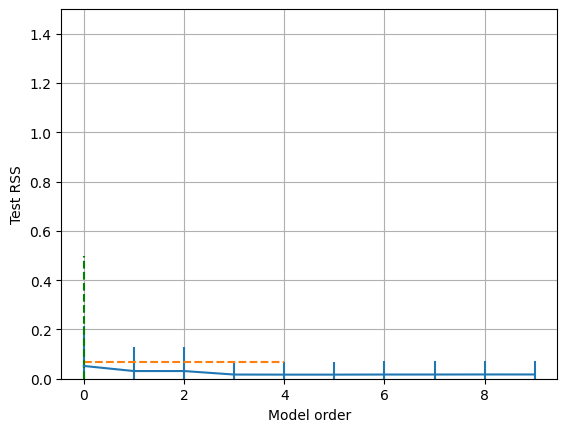

In [24]:
#One standard Approach
imin=np.argmin(RSS_mean)
RSS_tgt=RSS_mean[imin]+RSS_std[imin]
I=np.where(RSS_mean<=RSS_tgt)[0]
iopt=I[0]
dopt=dtest[iopt]
plt.errorbar(dtest,RSS_mean,yerr=RSS_std,fmt='-')
# Plot the line on the RSS target
plt.plot([dtest[0],dtest[imin]],[RSS_tgt,RSS_tgt],'--')
#Plot the line at the optimal model order
plt.plot([dopt,dopt],[0,0.5],'g--')
plt.ylim(0,1.5)
plt.xlabel('Model order')
plt.ylabel('Test RSS')
plt.grid()

#Print the result
print("The estimated ,model order is %d" % dopt)